In [1]:
from oceanmixedlayers import oceanmixedlayers
%load_ext autoreload
%autoreload 2

# Test profile 1

The first test uses a linear profile of temperature, decreasing from 20 deg C to 19 deg C over 100m depth.  

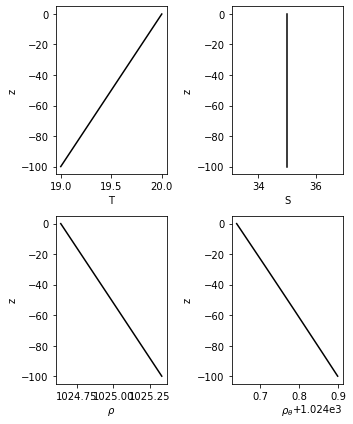

In [2]:
A=oceanmixedlayers.column(kind='idealized',idealized_type='linear',T0=20,dTdz=0.01,S0=35,nz=1000,Dpt=100)
A.plot_state();


In [3]:
# print the MLD from column A using the threshold method and verify

print(A.threshold())

#Expected answer: (array([21.45235602]), array([215]))

(array([21.45235602]), array([215]))


# Test profile 2

The second test uses a two-layer profile of temperature, decreasing from 20 deg C to 10 deg C at the midpoint of the 100m depth.  

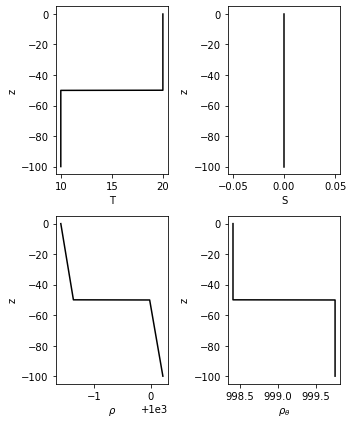

In [4]:
B=oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',T0=20,Tb0=10,nz=1000,Dpt=100)
B.plot_state();


In [5]:
#Print the MLD from column B using the gradient method and verify

print(B.gradient())

#Expected answer: (array([49.85]), array([498]))

(array([49.85]), array([498]))


# Test profile 3

The third test uses a two-layer profile of temperature, staying at 20 deg C for the first 80 m, before linearly decreasing at 0.01 degC/m to 100m depth.  

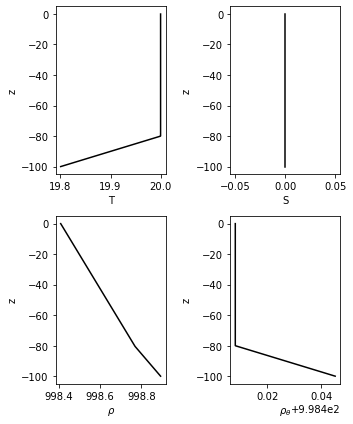

In [6]:
C=oceanmixedlayers.column(kind='idealized',idealized_type='two-layer',T0=20,Tb0=20,mixedfrac=0.8,
                          dTdz=0.01,nz=1000,Dpt=100)
C.plot_state();


In [7]:
#Print the MLD from the linear fit method and verify

print(C.linearfit())
#Expected answer: (array([79.95]), array([799]))

(array([79.95]), array([799]))


In [8]:
# Compute the MLD for all three profiles using the Holte and Talley algorithm and verify

OUT = A.holtetalley()
print('A: ',OUT[2])
OUT = B.holtetalley()
print('B: ',OUT[2])
OUT = C.holtetalley()
print('C: ',OUT[2])

#Expected answer: 
# A:  [10.10231894]
# B:  [48.92842264]
# C:  [78.32012462]
# Note units are dBar!

/net/bgr/Python/Packages/OML_TST/oceanmixedlayers/gradient.py:177: RuntimeWarning: invalid value encountered in true_divide
  error = error/np.nansum(error,axis=0)


A:  [10.10231894]
B:  [48.92842264]
C:  [78.32012462]


In [9]:
# Compute the MLD for all three profiles using the PE anomaly algorithm and verify


print('A: ',A.mld_pe_anomaly())
print('B: ',B.mld_pe_anomaly())
print('C: ',C.mld_pe_anomaly())

#Expected answer: 
# A:  [16.7015625]
# B:  [50.03044205]
# C:  [85.17050781]

# Note units are m!

A:  [16.7015625]
B:  [50.03044205]
C:  [85.17050781]


In [10]:
# Compute the MLD for all three profiles using the delta PE algorithm and verify

print('A: ',A.mld_delta_pe())
print('B: ',B.mld_delta_pe())
print('C: ',C.mld_delta_pe())

#Expected answer: 
# A:  [16.60033253]
# B:  [50.01116413]
# C:  [85.10048339]
# Note units are m!

A:  [16.70390614]
B:  [50.04950324]
C:  [85.14624031]
